In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [82]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [84]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

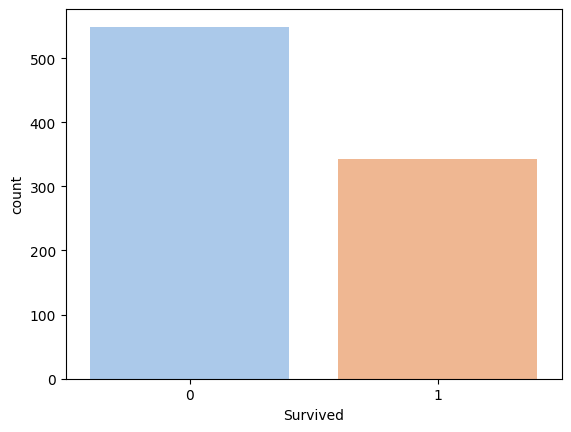

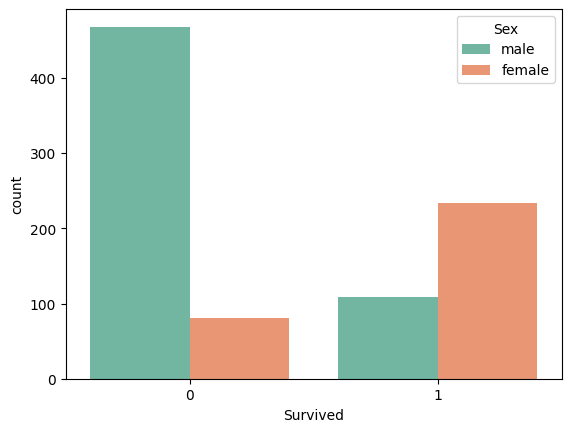

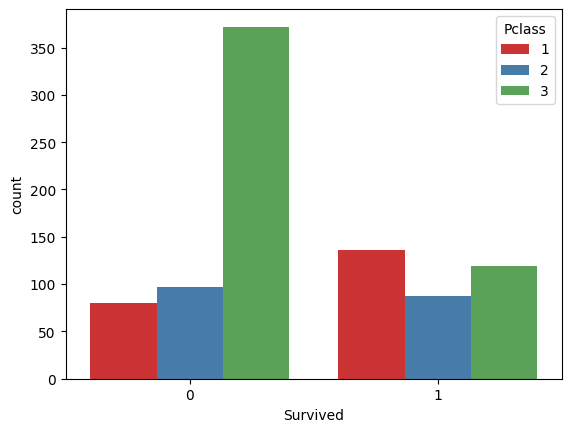

In [85]:
# Survival distribution
sns.countplot(x='Survived', hue='Survived', data=df, palette='pastel', legend=False)
plt.show()

# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.show()

# Survival by passenger class
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set1')
plt.show()

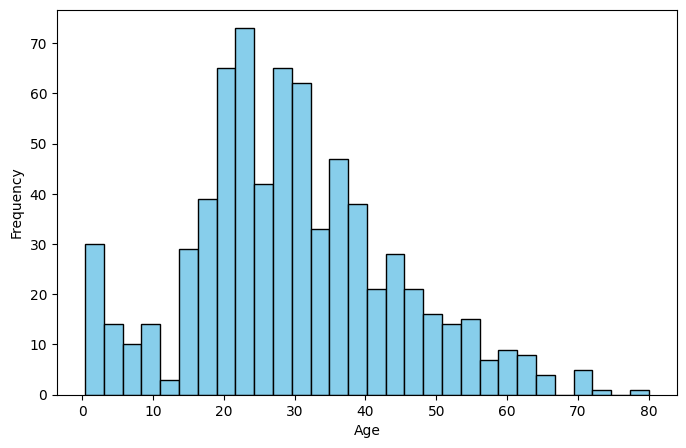

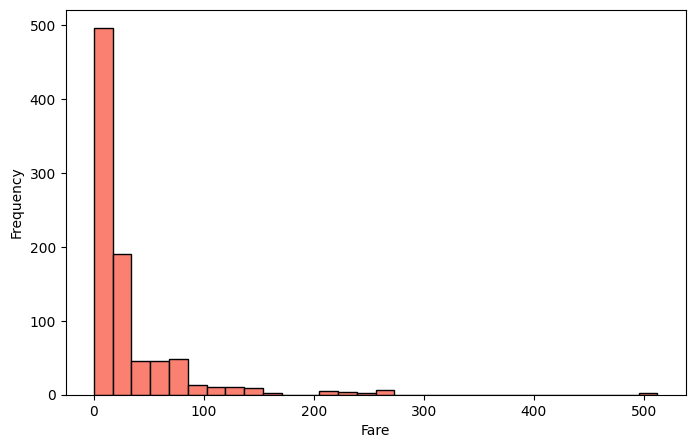

In [86]:
# Age Distribution
plt.figure(figsize=(8, 5))
df['Age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

# Fare Distribution
plt.figure(figsize=(8, 5))
df['Fare'].hist(bins=30, color='salmon', edgecolor='black')
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [87]:
# Drop Cabin since it's mostly missing
df.drop(columns='Cabin', inplace=True)

# Replace missing Age with median — the safe way
df['Age'] = df['Age'].fillna(df['Age'].median())

# Replace missing Embarked with mode — the safe way
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Final check for missing values
print("Missing values after cleaning:", df.isnull().sum())

Missing values after cleaning: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [88]:
# Encode 'Sex' column: male -> 0, female -> 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' and drop the first to avoid dummy variable trap
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Let's check the updated DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [89]:
# Dropping irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [90]:
x = df.drop('Survived', axis=1)

In [91]:
y = df['Survived']

In [92]:
df_1=pd.read_csv('test_titanic.csv')
df_1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [93]:
df_1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
df_1.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [95]:
df_1.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [96]:
df_1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [97]:
df_1.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

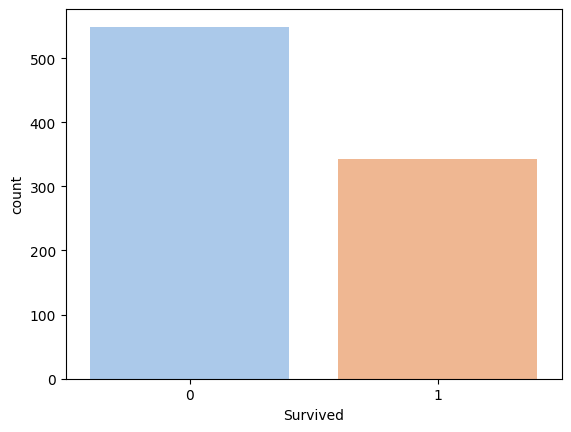

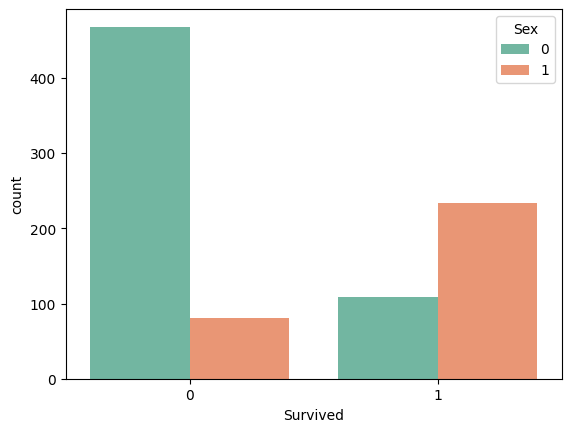

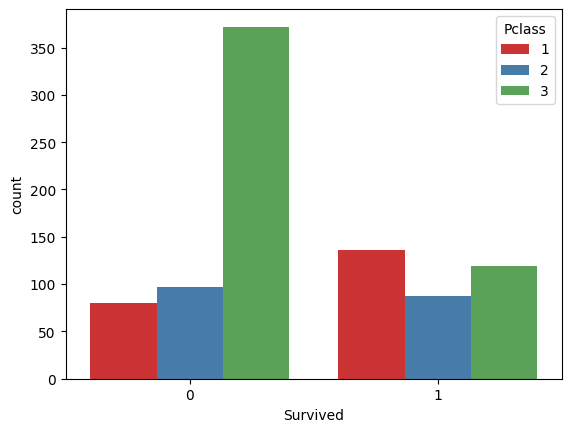

In [98]:
# Survival distribution
sns.countplot(x='Survived', hue='Survived', data=df, palette='pastel', legend=False)
plt.show()

# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.show()

# Survival by passenger class
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set1')
plt.show()

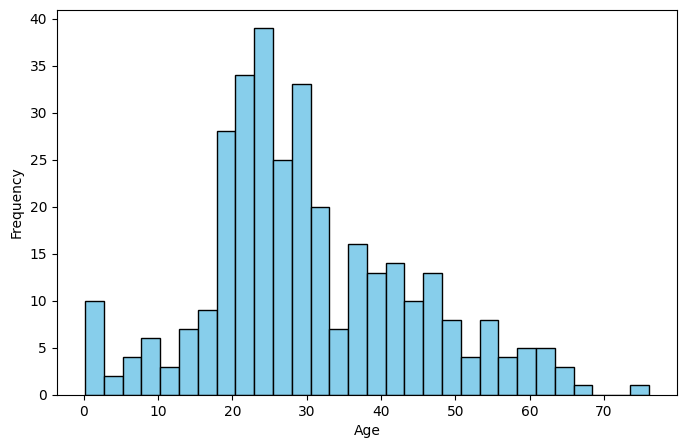

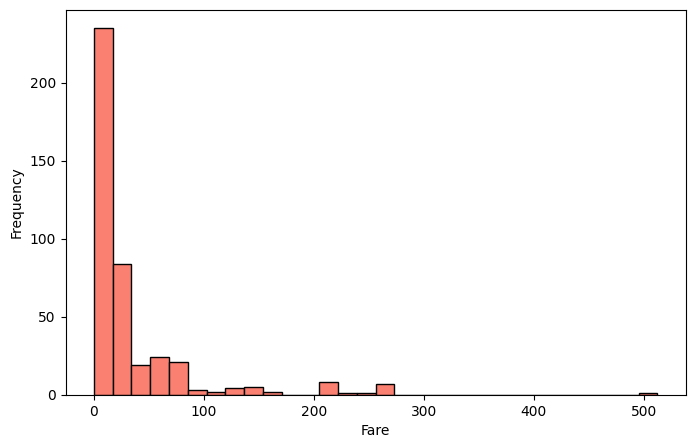

In [99]:
# Age Distribution
plt.figure(figsize=(8, 5))
df_1['Age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

# Fare Distribution
plt.figure(figsize=(8, 5))
df_1['Fare'].hist(bins=30, color='salmon', edgecolor='black')
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [100]:
# Drop Cabin since it's mostly missing
df_1.drop(columns='Cabin', inplace=True)

# Replace missing Age with median — the safe way
df_1['Age'] = df['Age'].fillna(df['Age'].median())

# Final check for missing values
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [101]:
# Encode 'Sex' column: male -> 0, female -> 1
df_1['Sex'] = df_1['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' and drop the first to avoid dummy variable trap
df_1= pd.get_dummies(df_1, columns=['Embarked'], drop_first=True)

# Let's check the updated DataFrame
df_1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,22.0,0,0,330911,7.8292,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,38.0,1,0,363272,7.0000,False,True
2,894,2,"Myles, Mr. Thomas Francis",0,26.0,0,0,240276,9.6875,True,False
3,895,3,"Wirz, Mr. Albert",0,35.0,0,0,315154,8.6625,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,35.0,1,1,3101298,12.2875,False,True


In [ ]:
# Dropping irrelevant columns
z=df_1.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [105]:
z=df_1

In [106]:
#model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
pred=model.predict(z)
pred

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values